In [1]:
import json
import re

In [2]:
data = []
with open("./Stat628/Total.json", encoding = "utf-8" ) as f:
     for line in f:
        data.append(json.loads(line))

In [4]:
data[0]

{'is_open': 0,
 'attributes': {'GoodForKids': 'False'},
 'postal_code': '85016',
 'categories': 'Golf, Active Life',
 'city': 'Phoenix',
 'hours': None,
 'longitude': -112.0184807,
 'Tip': [{'text': 'Played for the first there this past weekend and it was AMAZING',
   'date': '2015-09-23 01:38:48',
   'user_id': 'ce63dEP3lIW6UqMGLe_lfw',
   'business_id': '1SWheh84yJXfytovILXOAQ',
   'compliment_count': 0}],
 'stars': 3.0,
 'latitude': 33.5221425,
 'state': 'AZ',
 'review_count': 5,
 'name': 'Arizona Biltmore Golf Club',
 'address': '2818 E Camino Acequia Drive',
 'Review': [{'stars': 1.0,
   'cool': 0,
   'date': '2015-09-24 00:02:23',
   'text': "Don't go here if you expect consistent or reasonable hours for the driving range.  It's clear the goal for the owners of this course is to hammer down their expenses without any concern for the customer.",
   'user_id': 'WS95iyoiDkbLGeHtERa1-A',
   'review_id': 'BUgmey6v6hZ1WfjbIhpVBg',
   'useful': 2,
   'funny': 0,
   'business_id': '1SWhe

In [3]:
catagory = []
for i in data:
    catagory.append(i["categories"])

In [5]:
catagory[0:10]

['Golf, Active Life',
 'Specialty Food, Restaurants, Dim Sum, Imported Food, Food, Chinese, Ethnic Food, Seafood',
 'Sushi Bars, Restaurants, Japanese',
 'Insurance, Financial Services',
 'Plumbing, Shopping, Local Services, Home Services, Kitchen & Bath, Home & Garden, Water Heater Installation/Repair',
 'Shipping Centers, Couriers & Delivery Services, Local Services, Printing Services',
 'Beauty & Spas, Hair Salons',
 "Hair Salons, Hair Stylists, Barbers, Men's Hair Salons, Cosmetics & Beauty Supply, Shopping, Beauty & Spas",
 'Nail Salons, Beauty & Spas, Day Spas',
 'Beauty & Spas, Nail Salons, Day Spas, Massage']

In [16]:
#new is the index of Chinese Restautants
new = []
for i in catagory:
    if i == None:
        continue
    if "Chinese" in i:
        if ("Restaurant" in i) or ("Food" in i):
            new.append(catagory.index(i))

In [17]:
len(new)

4434

In [19]:
Chinese = [data[i] for i in new]

In [32]:
len(Chinese)

4434

In [21]:
text = []
for i in Chinese:
    reviews = i["Review"]
    for n in reviews:
        text.append(n["text"])
    

In [22]:
len(text)

447769

In [23]:
from nltk import sent_tokenize

sentences = []
for review in text:
    sentences += sent_tokenize(review)
    
print(sentences[0])

My girlfriend and I went for dinner at Emerald Chinese after a Thursday night workout.


In [24]:
len(sentences)

3599563

In [25]:
sentences[0]

'My girlfriend and I went for dinner at Emerald Chinese after a Thursday night workout.'

In [26]:
#delete the punctuation, split the words
sentences = [re.split(r"\W+", sentence) for sentence in sentences]

In [28]:
sentences[0]

['My',
 'girlfriend',
 'and',
 'I',
 'went',
 'for',
 'dinner',
 'at',
 'Emerald',
 'Chinese',
 'after',
 'a',
 'Thursday',
 'night',
 'workout',
 '']

In [30]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

In [33]:
print(stop_words)

{'ain', "won't", 'wouldn', 'in', 'further', 'hasn', 'be', 'which', 'where', 'its', 've', 'not', "should've", "shan't", 'we', 'some', 'didn', 'their', 'because', 'both', 'couldn', 'll', 'yours', 'above', 'over', 'if', 'y', 'again', 'itself', 'why', 'from', 'how', 'any', 't', 'that', 'them', "didn't", 'those', 'i', 'should', 'mustn', 'while', 'after', 'off', 'all', 'through', 'me', 'on', 'd', "needn't", 'haven', 'was', 'being', 'themselves', 'very', 'it', 'just', 'until', 'no', 'with', 'm', 'same', "haven't", "wouldn't", "mightn't", 'or', 'hers', 'most', 'yourself', 'your', "you'll", 'into', 'now', 'myself', 'a', 'will', 'were', 'have', 'as', 'had', 'theirs', 'here', 'for', 'the', "mustn't", 'shouldn', 'him', 'are', 'then', 'does', 'wasn', 'so', 'ma', 'am', 'during', 'but', 'weren', 'has', 'yourselves', 'our', 'whom', 'these', 'been', 'did', 'an', 'between', 'other', "couldn't", 're', 'hadn', "aren't", "isn't", 'shan', "you'd", 'himself', 'don', 'her', 'to', 'they', 'of', 'against', "sho

In [34]:
#delete the space and the stop words
sentences_clean = []
for sentence in sentences:
    cleaned = []
    for word in sentence:
        if (word != "") and (not word in stop_words):
            cleaned.append(word.lower())
    sentences_clean.append(cleaned)
            

In [42]:
sentences_clean[0:10]

[['my',
  'girlfriend',
  'i',
  'went',
  'dinner',
  'emerald',
  'chinese',
  'thursday',
  'night',
  'workout'],
 ['we', 'arrived', 'around', '7', '30pm', 'seated', 'short', 'wait'],
 ['after',
  'browsing',
  'menu',
  'brief',
  'discussion',
  'waiter',
  'ordered',
  'seafood',
  'noodles',
  '3',
  'item',
  'mix',
  'meat',
  'plate',
  'bbq',
  'pork',
  'chicken',
  'duck',
  'the',
  'food',
  'came',
  'soon',
  'thereafter',
  'hot',
  'delicious'],
 ['there',
  'large',
  'portions',
  'lots',
  'seafood',
  'seafood',
  'noodles',
  'mix',
  'meat',
  'plate',
  'came',
  'good',
  'cuts',
  'meat',
  'correct',
  'sauces'],
 ['after', 'meal', 'received', 'fortune', 'cookies', 'dessert'],
 ['food', 'the', 'food', 'good', 'quality'],
 ['ingredients', 'tasted', 'fresh', 'dishes', 'tasted', 'well', 'made'],
 ['food',
  'average',
  'nothing',
  'stood',
  'even',
  'though',
  'i',
  'quite',
  'hungry'],
 ['price',
  'price',
  'high',
  'comparative',
  'chinese',
  'c

In [43]:
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()

In [45]:
#Stemming and lemmatizing
sentences_stemmed =[]
for sentence in sentences_clean:
    stemmed = []
    for word in sentence:
        stemmed.append(porter.stem(word))
        
    sentences_stemmed.append(stemmed)

In [74]:
sentences_stemmed[0:10]

[['my',
  'girlfriend',
  'i',
  'went',
  'dinner',
  'emerald',
  'chines',
  'thursday',
  'night',
  'workout'],
 ['we', 'arriv', 'around', '7', '30pm', 'seat', 'short', 'wait'],
 ['after',
  'brows',
  'menu',
  'brief',
  'discuss',
  'waiter',
  'order',
  'seafood',
  'noodl',
  '3',
  'item',
  'mix',
  'meat',
  'plate',
  'bbq',
  'pork',
  'chicken',
  'duck',
  'the',
  'food',
  'came',
  'soon',
  'thereaft',
  'hot',
  'delici'],
 ['there',
  'larg',
  'portion',
  'lot',
  'seafood',
  'seafood',
  'noodl',
  'mix',
  'meat',
  'plate',
  'came',
  'good',
  'cut',
  'meat',
  'correct',
  'sauc'],
 ['after', 'meal', 'receiv', 'fortun', 'cooki', 'dessert'],
 ['food', 'the', 'food', 'good', 'qualiti'],
 ['ingredi', 'tast', 'fresh', 'dish', 'tast', 'well', 'made'],
 ['food', 'averag', 'noth', 'stood', 'even', 'though', 'i', 'quit', 'hungri'],
 ['price',
  'price',
  'high',
  'compar',
  'chines',
  'cuisin',
  'compar',
  'larg',
  'western',
  'restaur',
  'chain'],
 [

In [47]:
# Something can also be deleted : Numbers, Date, 

In [69]:
#Write a Chinese.text included all the cleaned word
with open("Chinese.text", "w", encoding= "utf-8") as p:
    for sentence in sentences_stemmed:
        for word in sentence:
            p.write(word+"\n")

In [48]:
from gensim.models import Word2Vec

In [49]:
model = Word2Vec(sentences_stemmed, min_count = 100, workers = 8)

In [50]:
print(model)

Word2Vec(vocab=5146, size=100, alpha=0.025)


In [51]:
words = list(model.wv.vocab)

In [52]:
model.wv.save_word2vec_format('model.bin')
#model = Word2Vec.load('model.bin')

In [53]:
print(words[0:100])

['my', 'girlfriend', 'i', 'went', 'dinner', 'emerald', 'chines', 'thursday', 'night', 'we', 'arriv', 'around', '7', '30pm', 'seat', 'short', 'wait', 'after', 'brows', 'menu', 'brief', 'discuss', 'waiter', 'order', 'seafood', 'noodl', '3', 'item', 'mix', 'meat', 'plate', 'bbq', 'pork', 'chicken', 'duck', 'the', 'food', 'came', 'soon', 'hot', 'delici', 'there', 'larg', 'portion', 'lot', 'good', 'cut', 'correct', 'sauc', 'meal', 'receiv', 'fortun', 'cooki', 'dessert', 'qualiti', 'ingredi', 'tast', 'fresh', 'dish', 'well', 'made', 'averag', 'noth', 'stood', 'even', 'though', 'quit', 'hungri', 'price', 'high', 'compar', 'cuisin', 'western', 'restaur', 'chain', 'servic', 'slightli', 'a', 'common', 'poor', 'waitress', 'impati', 'except', 'staff', 'appear', 'rush', 'all', 'need', 'met', 'grumpi', 'decor', 'comfort', 'chair', 'nice', 'tablecloth', 'suffici', 'room', 'navig', 'tabl', 'overal']


In [54]:
X = model[model.wv.vocab]

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [55]:
from sklearn.decomposition import PCA
from matplotlib import pyplot

In [56]:
pca = PCA(n_components=2)
result = pca.fit_transform(X)

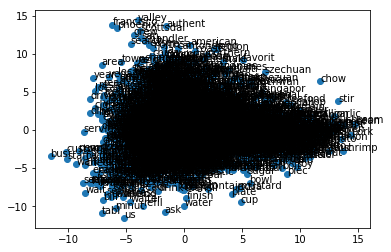

In [57]:
pyplot.scatter(result[:, 0], result[:, 1])

for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))


pyplot.show()